<a href="https://colab.research.google.com/github/ArchitTheCoder/C117/blob/main/C117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving C117.csv to C117.csv


In [16]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv("C117.csv")
print(data.head(10))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9   57    1   2       150   168    0  ...      0      1.6      2   0     2       1

[10 rows x 14 columns]


In [8]:
age = data["age"]
target = data["target"]

age_train, age_test, target_train, target_test = train_test_split(age, target, test_size= 0.25, random_state= 0)

In [12]:
X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(target_train.ravel(), (len(target_train), 1))

classifier = LogisticRegression(random_state= 0)
classifier.fit(X, Y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))
Y_test = np.reshape(target_test.ravel(), (len(target_test), 1))

target_prediction = classifier.predict(X_test)

predicted_values = []
for i in target_prediction:
  if i == 0:
    predicted_values.append("No")
  else: 
    predicted_values.append("Yes")

actual_values = []
for i in Y_test.ravel():
  if i == 1:
    actual_values.append("No")
  else: 
    actual_values.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

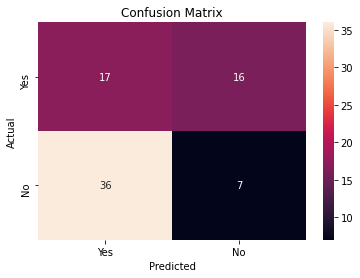

In [26]:
labels = ["Yes", "No"]

cm = confusion_matrix(actual_values, predicted_values, labels)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [28]:
accuracy = (17 + 7)/(17+7+36+16)
print(accuracy*100)

31.57894736842105
